<a href="https://colab.research.google.com/github/lavanyabonthu/codsoft/blob/machine-learning/TASK3_CODSOFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.drop(columns=['Surname', 'RowNumber', 'CustomerId'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
df = pd.get_dummies(df, columns = ['Geography','Gender'], drop_first = True)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

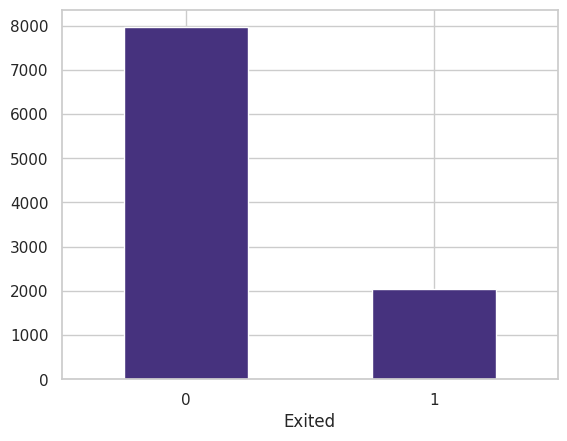

In [18]:
df["Exited"].value_counts().plot(kind = "bar")
plt.xticks(rotation=0)

In [19]:
not_Exited = df[df["Exited"] == 0]
Exited = df[df["Exited"] == 1]

print(not_Exited.shape[0])
print(Exited.shape[0])

7963
2037


In [20]:
not_Exited = not_Exited.sample(Exited.shape[0], random_state=42)

df_new = pd.concat([not_Exited , Exited])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

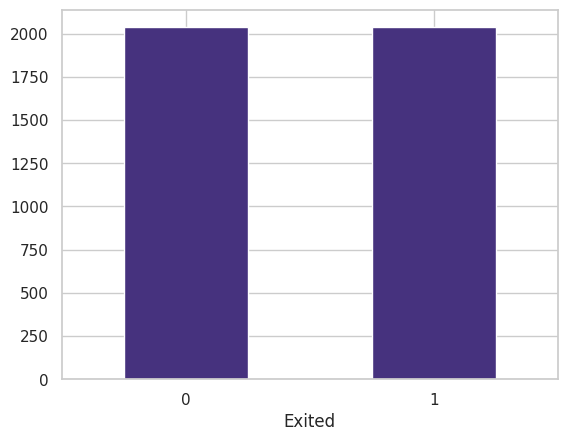

In [21]:
df_new["Exited"].value_counts().plot(kind = "bar")
plt.xticks(rotation=0)

In [22]:
corr = df_new.corr()

<Axes: >

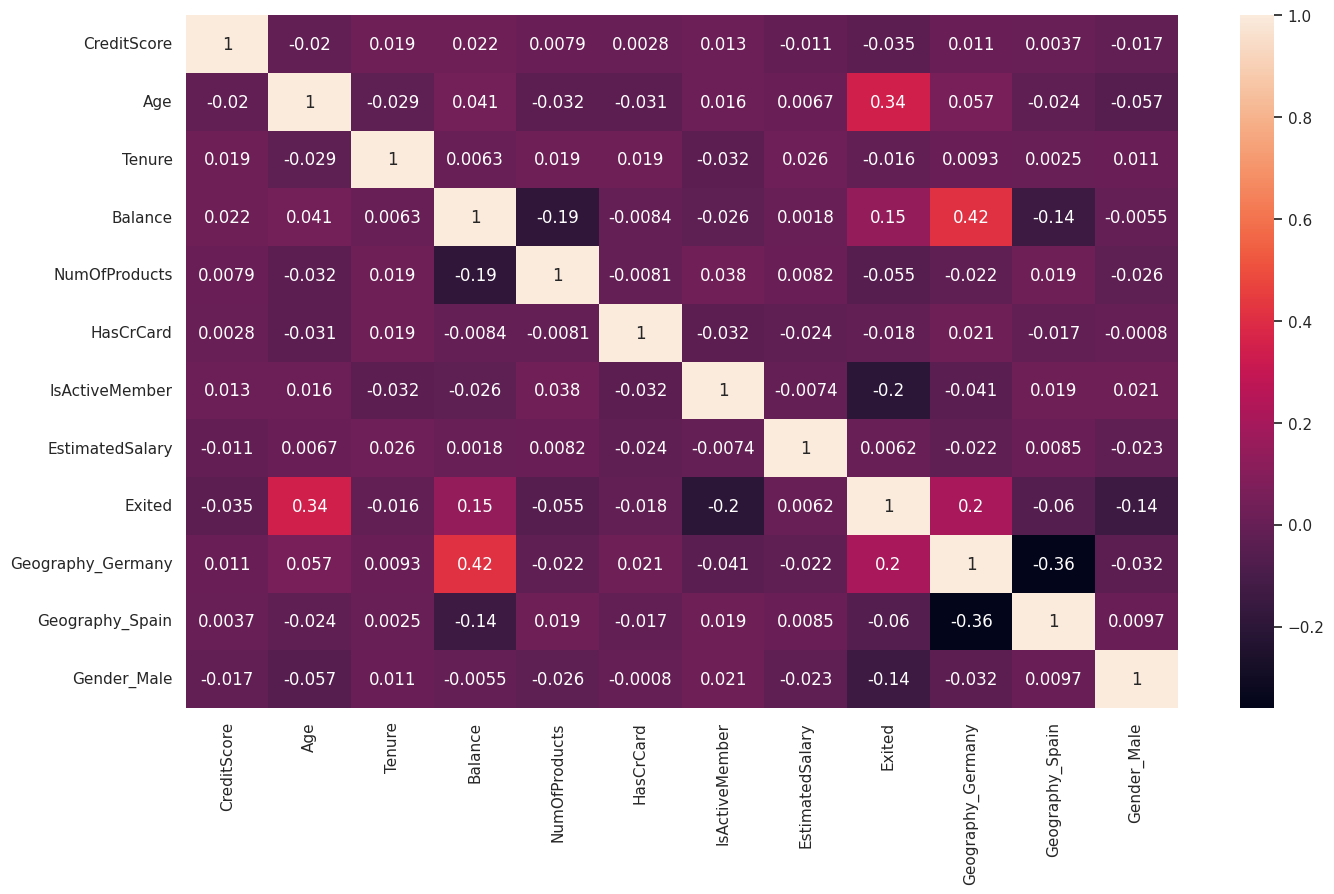

In [23]:
plt.figure(figsize = (16, 9))
sns.heatmap(corr, annot = True)

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [25]:
X = df_new.drop(columns = "Exited" , axis = 1)
y = df_new["Exited"]

In [26]:
columns = df_new.columns.tolist()
columns.remove('Exited')

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
df_new[X.columns] = X
df_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
8165,-0.437660,-0.391494,1.045749,1.187445,0.724545,0.643500,-0.925679,-0.208295,0,-0.663389,1.841219,0.977187
6409,0.350901,-0.766775,1.392065,-1.343806,0.724545,0.643500,1.080288,-1.080888,0,-0.663389,-0.543119,-1.023346
2157,0.975605,0.265248,-0.685832,-1.343806,0.724545,0.643500,1.080288,1.524534,0,-0.663389,-0.543119,-1.023346
1618,0.494275,-1.329697,1.045749,0.966753,0.724545,0.643500,-0.925679,-0.182420,0,-0.663389,-0.543119,0.977187
1633,-0.888267,-0.579134,0.699433,-1.343806,-0.760262,-1.554001,-0.925679,-0.905983,0,-0.663389,-0.543119,0.977187
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,-1.543694,0.077608,-0.685832,1.143714,-0.760262,0.643500,1.080288,-0.826631,1,1.507411,-0.543119,0.977187
9982,0.064151,0.452889,0.699433,0.900024,-0.760262,0.643500,-0.925679,0.243434,1,1.507411,-0.543119,-1.023346
9991,-0.529830,1.109631,-0.339516,0.102198,-0.760262,0.643500,-0.925679,-0.550197,1,-0.663389,-0.543119,-1.023346
9997,0.617168,-0.485314,0.699433,-1.343806,-0.760262,-1.554001,1.080288,-1.023637,1,-0.663389,-0.543119,-1.023346


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=18),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}

In [29]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [30]:
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
# Create a DataFrame to display the results
results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.720245,0.686528,0.712366,0.699208
Decision Tree,0.683436,0.657459,0.639785,0.648501
Random Forest,0.752147,0.741477,0.701613,0.720994
Gradient Boosting,0.775460,0.761773,0.739247,0.750341
XGBoost,0.753374,0.738162,0.712366,0.725034
SVC,0.763190,0.749304,0.723118,0.735978
KNN,0.738650,0.723944,0.690860,0.707015
Naive Bayes,0.727607,0.715517,0.669355,0.691667
AdaBoost,0.760736,0.746518,0.720430,0.733242


In [31]:
Gradient_model = GradientBoostingClassifier()
Gradient_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
# Print confusion matrix and classification report
y_pred = Gradient_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[357  86]
 [ 97 275]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       443
           1       0.76      0.74      0.75       372

    accuracy                           0.78       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.78      0.78      0.78       815



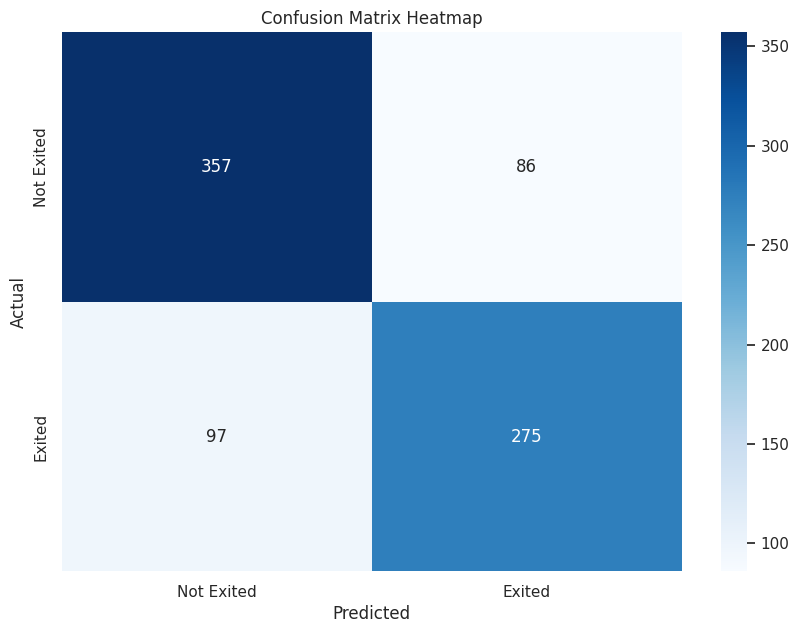

In [33]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [34]:
import joblib
joblib.dump(Gradient_model, 'Gradient_model.pkl')

['Gradient_model.pkl']